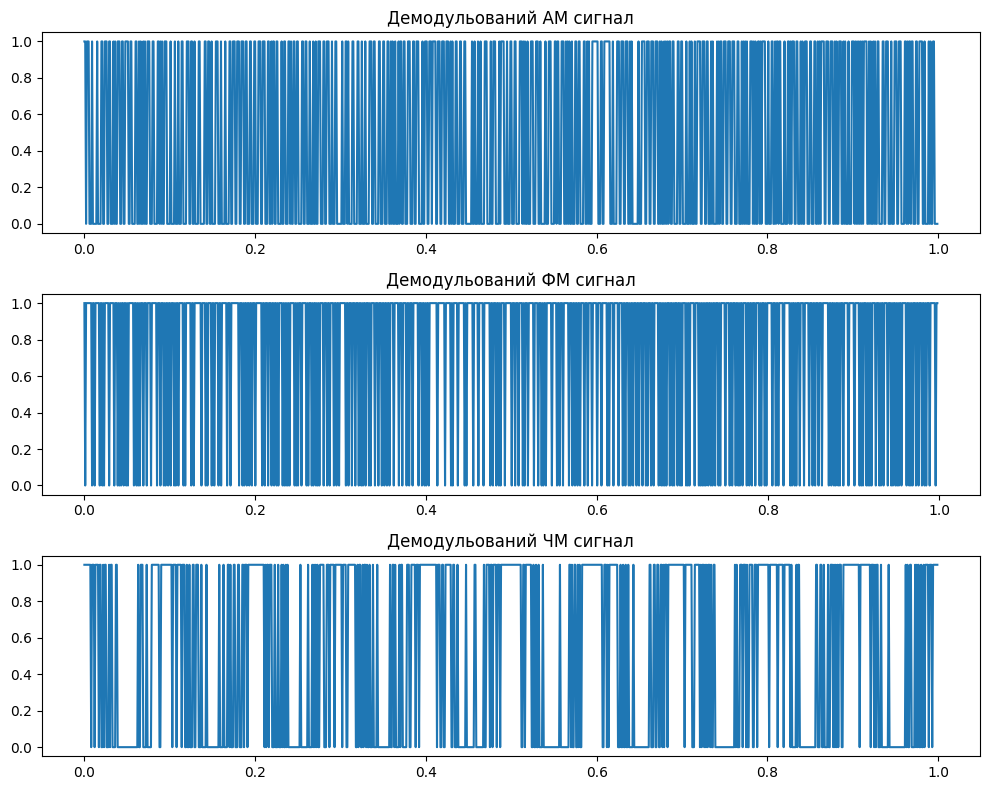

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000  
t = np.arange(0, 1, 1/fs)  
f_c = 100  
SNR_dB = 10  
data = np.random.randint(0, 2, len(t))

def generate_am_signal(data, f_c, t):
    return (1 + data) * np.cos(2 * np.pi * f_c * t)

def generate_fm_signal(data, f_c, t):
    return np.cos(2 * np.pi * f_c * t + np.pi * data)

def generate_fsk_signal(data, f_c, t):
    f_shift = 10
    return np.where(data == 1, 
                    np.cos(2 * np.pi * (f_c + f_shift) * t), 
                    np.cos(2 * np.pi * (f_c - f_shift) * t))

def add_noise(signal, SNR_dB):
    SNR_linear = 10 ** (SNR_dB / 10)
    power_signal = np.mean(signal ** 2)
    power_noise = power_signal / SNR_linear
    noise = np.sqrt(power_noise) * np.random.randn(len(signal))
    return signal + noise

def demodulate_am(signal, t):
    envelope = np.abs(signal)
    return envelope > np.mean(envelope)

def demodulate_fm(signal, t, f_c):
    phase = np.unwrap(np.angle(signal))
    frequency_deviation = np.diff(phase) / (2.0 * np.pi * np.diff(t))
    return frequency_deviation > np.mean(frequency_deviation)

def demodulate_fsk(signal, t, f_c):
    analytic_signal = np.exp(1j * 2 * np.pi * f_c * t)
    product = signal * analytic_signal
    return np.real(product) > np.mean(np.real(product))

am_signal = generate_am_signal(data, f_c, t)
fm_signal = generate_fm_signal(data, f_c, t)
fsk_signal = generate_fsk_signal(data, f_c, t)

noisy_am_signal = add_noise(am_signal, SNR_dB)
noisy_fm_signal = add_noise(fm_signal, SNR_dB)
noisy_fsk_signal = add_noise(fsk_signal, SNR_dB)

demodulated_am = demodulate_am(noisy_am_signal, t)
demodulated_fm = demodulate_fm(noisy_fm_signal, t, f_c)
demodulated_fsk = demodulate_fsk(noisy_fsk_signal, t, f_c)

plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, demodulated_am, label='АМ')
plt.title('Демодульований АМ сигнал')

plt.subplot(3, 1, 2)
plt.plot(t[:-1], demodulated_fm, label='ФМ')
plt.title('Демодульований ФМ сигнал')

plt.subplot(3, 1, 3)
plt.plot(t, demodulated_fsk, label='ЧМ')
plt.title('Демодульований ЧМ сигнал')

plt.tight_layout()
plt.show()
